In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os 
import re

In [2]:
emails = {}

In [3]:
root_dir = 'C:\\Users\\Administrator\\Downloads\\Email\\emaildataset'
for entry in os.listdir(root_dir):
    if (os.path.isdir(os.path.join(root_dir, entry))):
        for entry_ in os.listdir(os.path.join(root_dir, entry)):
            if entry_.endswith('.txt'):
                f = open(os.path.join(root_dir, entry+ '\\'+ entry_))
                emails[entry_] = f.read()
                f.close()            

In [4]:
df = pd.DataFrame.from_dict(emails, orient='index',columns= ['FileData']).reset_index()
df.columns = ['FileName','FileContent']
df.head()

,FileName,FileContent
0,3-1msg1.txt,Subject: re : 2 . 882 s - > np np\n\n> date : ...
1,3-1msg2.txt,Subject: s - > np + np\n\nthe discussion of s ...
2,3-1msg3.txt,Subject: 2 . 882 s - > np np\n\n. . . for me i...
3,3-375msg1.txt,"Subject: gent conference\n\n"" for the listserv..."
4,3-378msg1.txt,Subject: query : causatives in korean\n\ncould...


In [5]:
def identifySpam(text):
    if "spmsg" in text:
        return 1
    else:
        return 0

In [6]:
df.loc[:, ('Label')]= df['FileName'].apply(identifySpam)

In [7]:
df.head()

,FileName,FileContent,Label
0,3-1msg1.txt,Subject: re : 2 . 882 s - > np np\n\n> date : ...,0
1,3-1msg2.txt,Subject: s - > np + np\n\nthe discussion of s ...,0
2,3-1msg3.txt,Subject: 2 . 882 s - > np np\n\n. . . for me i...,0
3,3-375msg1.txt,"Subject: gent conference\n\n"" for the listserv...",0
4,3-378msg1.txt,Subject: query : causatives in korean\n\ncould...,0


In [8]:
df['Label'].value_counts()

0    2412
1     481
Name: Label, dtype: int64

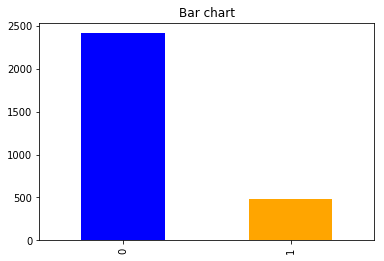

In [9]:
count_Class=pd.value_counts(df["Label"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

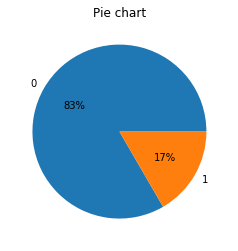

In [10]:
count_Class.plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Pie chart')
plt.ylabel('')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.svm import SVC

In [12]:
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_recall_curve, precision_score, accuracy_score
from sklearn.metrics import recall_score, classification_report, f1_score, roc_curve, auc

In [13]:
import seaborn as sns
sns.set()

In [14]:
X = df['FileContent']
Y = df['Label']

In [15]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2,random_state=42)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(2314,) (2314,)
(579,) (579,)


In [16]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc='best')

# MODEL 1 TFIDF + LOGISTIC REGRESSION On Un Processed Data

In [17]:
text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', LogisticRegression()), ])
text_clf.fit(xtrain, ytrain) 
pred = text_clf.predict(xtest)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [18]:
lr_pred_prb = text_clf.predict_proba(xtest)[:,1]

In [19]:
tn, fp, fn, tp = confusion_matrix(ytest, pred).ravel()
conf_matrix=pd.DataFrame({"Pred Not Spam":[tn,fn],"Predicted Spam":[fp,tp]},index=["Not Spam","Spam"])
conf_matrix

,Pred Not Spam,Predicted Spam
Not Spam,493,0
Spam,10,76


In [20]:
accuracy_lr = accuracy_score(ytest,pred)
print("Accuracy: {}".format(accuracy_lr))
precision_lr = precision_score(ytest,pred)
print("Precision: {}".format(precision_lr))
recall_lr = recall_score(ytest,pred)
print("Recall: {}".format(recall_lr))
f1_lr =f1_score(ytest,pred)
print("F1 Score: {}".format(f1_lr))

Accuracy: 0.9827288428324698
Precision: 1.0
Recall: 0.8837209302325582
F1 Score: 0.9382716049382717


In [21]:
fpr,tpr,threshold=roc_curve(ytest,lr_pred_prb)
auc_lr=roc_auc_score(ytest,lr_pred_prb)
auc_lr

0.998726355016746

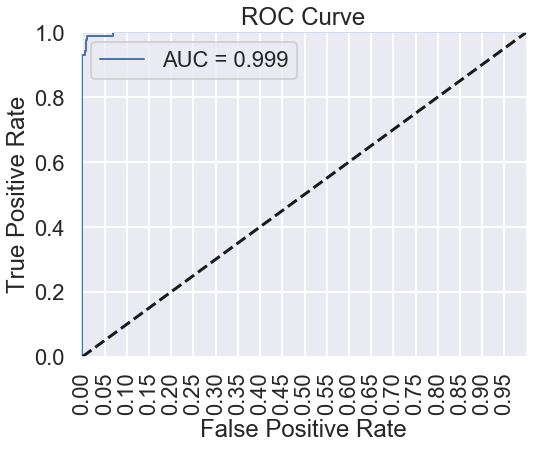

In [22]:
sns.set_context('poster')
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_lr)

# MODEL 2 TFIDF + SVM On Un Processed Data

In [23]:
clf_svm = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', SVC(kernel='linear',probability=True))])
clf_svm.fit(xtrain, ytrain) 
pred = clf_svm.predict(xtest)

In [24]:
tn, fp, fn, tp = confusion_matrix(ytest, pred).ravel()
conf_matrix=pd.DataFrame({"Pred Not Spam":[tn,fn],"Predicted Spam":[fp,tp]},index=["Not Spam","Spam"])
conf_matrix

,Pred Not Spam,Predicted Spam
Not Spam,491,2
Spam,4,82


In [25]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       493
           1       0.98      0.95      0.96        86

   micro avg       0.99      0.99      0.99       579
   macro avg       0.98      0.97      0.98       579
weighted avg       0.99      0.99      0.99       579



In [26]:
accuracy_svm = accuracy_score(ytest,pred)
print("Accuracy: {}".format(accuracy_svm))
precision_svm = precision_score(ytest,pred)
print("Precision: {}".format(precision_svm))
recall_svm = recall_score(ytest,pred)
print("Recall: {}".format(recall_svm))
f1_svm =f1_score(ytest,pred)
print("F1 Score: {}".format(f1_svm))

Accuracy: 0.9896373056994818
Precision: 0.9761904761904762
Recall: 0.9534883720930233
F1 Score: 0.9647058823529412


In [27]:
svm_pred_prb = clf_svm.predict_proba(xtest)[:,1]

In [28]:
fpr,tpr,threshold=roc_curve(ytest,svm_pred_prb)

In [29]:
auc_lr=roc_auc_score(ytest,svm_pred_prb)
auc_lr

0.9996226237086654

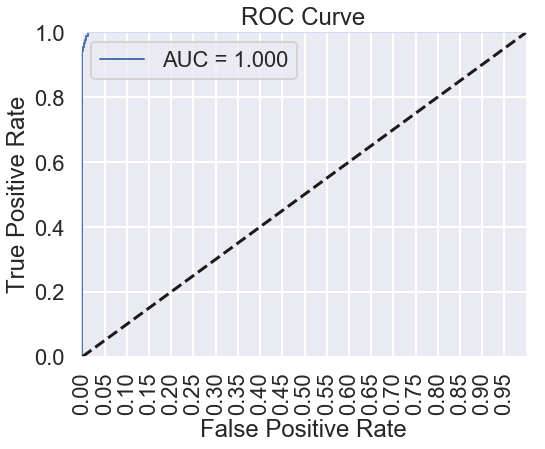

In [30]:
sns.set_context('poster')
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_lr)

# MODEL 3 TFIDF + Decision Tree On Un Processed Data

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
clf_dt = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', DecisionTreeClassifier(criterion='entropy'))])
clf_dt.fit(xtrain, ytrain) 
dt_pred = clf_dt.predict(xtest)

In [33]:
dt_pred_prb=clf_dt.predict_proba(xtest)[:,1]

In [34]:
print(classification_report(ytest,dt_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       493
           1       0.89      0.90      0.89        86

   micro avg       0.97      0.97      0.97       579
   macro avg       0.93      0.94      0.94       579
weighted avg       0.97      0.97      0.97       579



In [35]:
accuracy_dt = accuracy_score(ytest,dt_pred)
print("Accuracy: {}".format(accuracy_dt))
precision_dt = precision_score(ytest,dt_pred)
print("Precision: {}".format(precision_dt))
recall_dt = recall_score(ytest,dt_pred)
print("Recall: {}".format(recall_dt))
f1_dt =f1_score(ytest,dt_pred)
print("F1 Score: {}".format(f1_dt))

Accuracy: 0.9671848013816926
Precision: 0.8850574712643678
Recall: 0.8953488372093024
F1 Score: 0.8901734104046243


0.9375324307750366


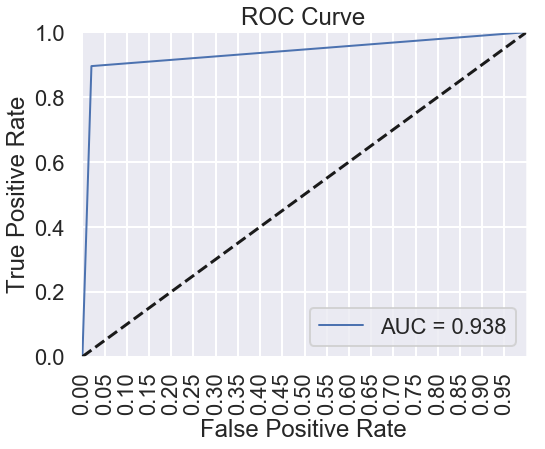

In [36]:
sns.set_context('poster')
auc_dt=roc_auc_score(ytest,dt_pred_prb)
print(auc_dt)
fpr,tpr,threshold=roc_curve(ytest,dt_pred_prb)
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_dt)

## Removing  Special Characters And Digits

In [37]:
def RemoveSpecialCharacterAndNumbers(text):
    return re.sub('[^A-Za-z]+', ' ', text)

In [38]:
df.loc[:, ('Preprocessed')]= df['FileContent'].apply(RemoveSpecialCharacterAndNumbers)

In [39]:
df.head()

,FileName,FileContent,Label,Preprocessed
0,3-1msg1.txt,Subject: re : 2 . 882 s - > np np\n\n> date : ...,0,Subject re s np np date sun dec est from micha...
1,3-1msg2.txt,Subject: s - > np + np\n\nthe discussion of s ...,0,Subject s np np the discussion of s np np remi...
2,3-1msg3.txt,Subject: 2 . 882 s - > np np\n\n. . . for me i...,0,Subject s np np for me it s much more restrict...
3,3-375msg1.txt,"Subject: gent conference\n\n"" for the listserv...",0,Subject gent conference for the listserv inter...
4,3-378msg1.txt,Subject: query : causatives in korean\n\ncould...,0,Subject query causatives in korean could anyon...


In [85]:
X = df['Preprocessed']
Y = df['Label']

In [86]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2,random_state=42)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(2314,) (2314,)
(579,) (579,)


# MODEL 1 TFIDF + LOGISTIC REGRESSION On Removed Special Characters

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


          Pred Not Spam  Predicted Spam
Not Spam            493               0
Spam                 10              76
Accuracy: 0.9827288428324698
Precision: 1.0
Recall: 0.8837209302325582
F1 Score: 0.9382716049382717
AUC Score: 0.9987027689985377


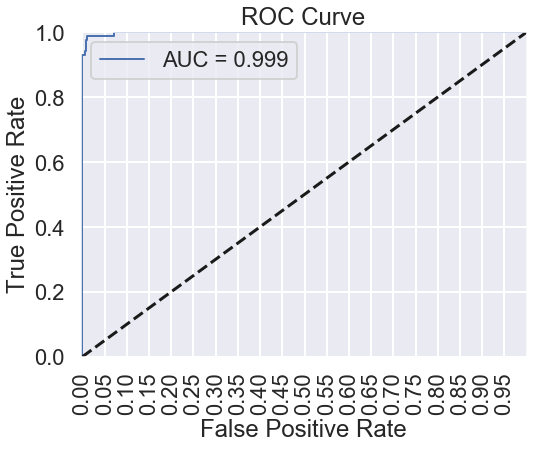

In [87]:
clf_log_1 = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', LogisticRegression()), ])
clf_log_1.fit(xtrain, ytrain) 
pred = clf_log_1.predict(xtest)
lr_pred_prb = clf_log_1.predict_proba(xtest)[:,1]
tn, fp, fn, tp = confusion_matrix(ytest, pred).ravel()
conf_matrix = pd.DataFrame({"Pred Not Spam":[tn,fn],"Predicted Spam":[fp,tp]},index=["Not Spam","Spam"])
print(conf_matrix)
accuracy_lr = accuracy_score(ytest,pred)
print("Accuracy: {}".format(accuracy_lr))
precision_lr = precision_score(ytest,pred)
print("Precision: {}".format(precision_lr))
recall_lr = recall_score(ytest,pred)
print("Recall: {}".format(recall_lr))
f1_lr = f1_score(ytest,pred)
print("F1 Score: {}".format(f1_lr))
fpr,tpr,threshold=roc_curve(ytest,lr_pred_prb)
auc_lr = roc_auc_score(ytest,lr_pred_prb)
print("AUC Score: {}".format(auc_lr))
sns.set_context('poster')
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_lr)

# MODEL 2 TFIDF + SVM On Removed Special Characters

          Pred Not Spam  Predicted Spam
Not Spam            491               2
Spam                  4              82
Accuracy: 0.9896373056994818
Precision: 0.9761904761904762
Recall: 0.9534883720930233
F1 Score: 0.9647058823529412
AUC Score: 0.9996697957450823


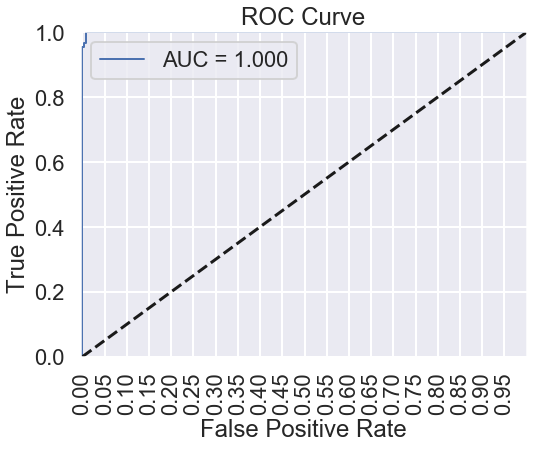

In [43]:
clf_svm_1 = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', SVC(kernel='linear',probability=True)), ])
clf_svm_1.fit(xtrain, ytrain) 
pred = clf_svm_1.predict(xtest)
svm_pred_prb = clf_svm_1.predict_proba(xtest)[:,1]
tn, fp, fn, tp = confusion_matrix(ytest, pred).ravel()
conf_matrix = pd.DataFrame({"Pred Not Spam":[tn,fn],"Predicted Spam":[fp,tp]},index=["Not Spam","Spam"])
print(conf_matrix)
accuracy_svm = accuracy_score(ytest,pred)
print("Accuracy: {}".format(accuracy_svm))
precision_svm = precision_score(ytest,pred)
print("Precision: {}".format(precision_svm))
recall_svm = recall_score(ytest,pred)
print("Recall: {}".format(recall_svm))
f1_svm = f1_score(ytest,pred)
print("F1 Score: {}".format(f1_svm))
fpr,tpr,threshold=roc_curve(ytest,svm_pred_prb)
auc_svm = roc_auc_score(ytest,svm_pred_prb)
print("AUC Score: {}".format(auc_svm))
sns.set_context('poster')
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_svm)

# Model 3 Decision Tree

          Pred Not Spam  Predicted Spam
Not Spam            486               7
Spam                  8              78
Accuracy: 0.9740932642487047
Precision: 0.9176470588235294
Recall: 0.9069767441860465
F1 Score: 0.9122807017543859
AUC Score: 0.9463889806122929


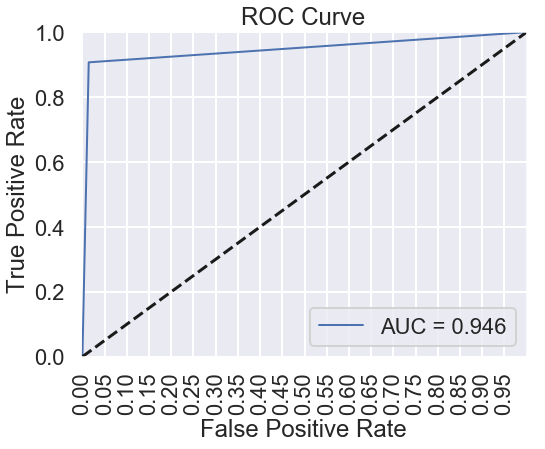

In [44]:
clf_dt_1 = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', DecisionTreeClassifier(criterion='entropy')), ])
clf_dt_1.fit(xtrain, ytrain) 
pred = clf_dt_1.predict(xtest)
dt_pred_prb = clf_dt_1.predict_proba(xtest)[:,1]
tn, fp, fn, tp = confusion_matrix(ytest, pred).ravel()
conf_matrix = pd.DataFrame({"Pred Not Spam":[tn,fn],"Predicted Spam":[fp,tp]},index=["Not Spam","Spam"])
print(conf_matrix)
accuracy_dt = accuracy_score(ytest,pred)
print("Accuracy: {}".format(accuracy_dt))
precision_dt = precision_score(ytest,pred)
print("Precision: {}".format(precision_dt))
recall_dt = recall_score(ytest,pred)
print("Recall: {}".format(recall_dt))
f1_dt = f1_score(ytest,pred)
print("F1 Score: {}".format(f1_dt))
fpr,tpr,threshold=roc_curve(ytest,dt_pred_prb)
auc_dt = roc_auc_score(ytest,dt_pred_prb)
print("AUC Score: {}".format(auc_dt))
sns.set_context('poster')
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_dt)

## Lower Casing, Stemming Words, Removing Stop Words  

In [45]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
Word_Punch_Tokenizer = nltk.WordPunctTokenizer()
Porter_Stemmer = PorterStemmer()
stop_words = stopwords.words('english')

In [46]:
def RemoveStopWords(doc):
    doc = doc.lower()
    doc = doc.strip()
    tokens = Word_Punch_Tokenizer.tokenize(doc)
    filtered_tokens = [token for token in tokens if token not in stop_words]
    doc = ' '.join(filtered_tokens)
    tokens = Word_Punch_Tokenizer.tokenize(doc)
    filtered_stemmed_word = [Porter_Stemmer.stem(token) for token in tokens]
    doc = ' '.join(filtered_stemmed_word)
    return doc

In [47]:
df.loc[:, ('FinalPreprocessedData')]= df['Preprocessed'].apply(RemoveStopWords)

In [48]:
X = df['FinalPreprocessedData']
Y = df['Label']

In [49]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2,random_state=42)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(2314,) (2314,)
(579,) (579,)


# Model 1

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


          Pred Not Spam  Predicted Spam
Not Spam            492               1
Spam                 18              68
Accuracy: 0.9671848013816926
Precision: 0.9855072463768116
Recall: 0.7906976744186046
F1 Score: 0.8774193548387097
AUC Score: 0.999481107599415


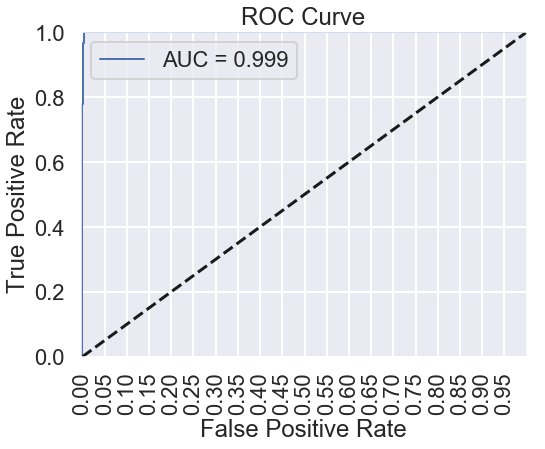

In [50]:
clf_log_1 = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', LogisticRegression()), ])
clf_log_1.fit(xtrain, ytrain) 
pred = clf_log_1.predict(xtest)
lr_pred_prb = clf_log_1.predict_proba(xtest)[:,1]
tn, fp, fn, tp = confusion_matrix(ytest, pred).ravel()
conf_matrix = pd.DataFrame({"Pred Not Spam":[tn,fn],"Predicted Spam":[fp,tp]},index=["Not Spam","Spam"])
print(conf_matrix)
accuracy_lr = accuracy_score(ytest,pred)
print("Accuracy: {}".format(accuracy_lr))
precision_lr = precision_score(ytest,pred)
print("Precision: {}".format(precision_lr))
recall_lr = recall_score(ytest,pred)
print("Recall: {}".format(recall_lr))
f1_lr = f1_score(ytest,pred)
print("F1 Score: {}".format(f1_lr))
fpr,tpr,threshold=roc_curve(ytest,lr_pred_prb)
auc_lr = roc_auc_score(ytest,lr_pred_prb)
print("AUC Score: {}".format(auc_lr))
sns.set_context('poster')
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_lr)

# Model 2

          Pred Not Spam  Predicted Spam
Not Spam            492               1
Spam                  5              81
Accuracy: 0.9896373056994818
Precision: 0.9878048780487805
Recall: 0.9418604651162791
F1 Score: 0.9642857142857143
AUC Score: 0.9997405537997076


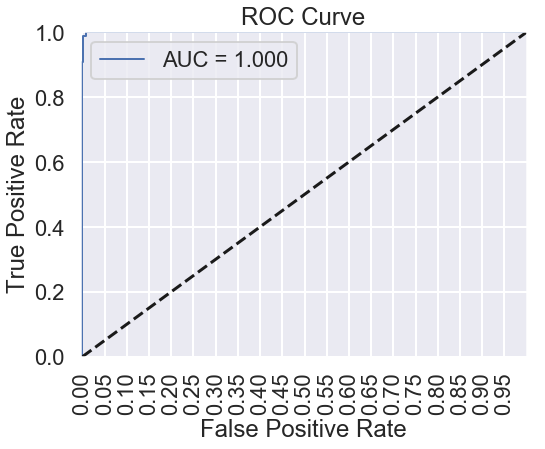

In [51]:
clf_svm_1 = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', SVC(kernel='linear',probability=True)), ])
clf_svm_1.fit(xtrain, ytrain) 
pred = clf_svm_1.predict(xtest)
svm_pred_prb = clf_svm_1.predict_proba(xtest)[:,1]
tn, fp, fn, tp = confusion_matrix(ytest, pred).ravel()
conf_matrix = pd.DataFrame({"Pred Not Spam":[tn,fn],"Predicted Spam":[fp,tp]},index=["Not Spam","Spam"])
print(conf_matrix)
accuracy_svm = accuracy_score(ytest,pred)
print("Accuracy: {}".format(accuracy_svm))
precision_svm = precision_score(ytest,pred)
print("Precision: {}".format(precision_svm))
recall_svm = recall_score(ytest,pred)
print("Recall: {}".format(recall_svm))
f1_svm = f1_score(ytest,pred)
print("F1 Score: {}".format(f1_svm))
fpr,tpr,threshold=roc_curve(ytest,svm_pred_prb)
auc_svm = roc_auc_score(ytest,svm_pred_prb)
print("AUC Score: {}".format(auc_svm))
sns.set_context('poster')
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_svm)

# Model 3

          Pred Not Spam  Predicted Spam
Not Spam            488               5
Spam                  8              78
Accuracy: 0.9775474956822107
Precision: 0.9397590361445783
Recall: 0.9069767441860465
F1 Score: 0.923076923076923
AUC Score: 0.9484173781782158


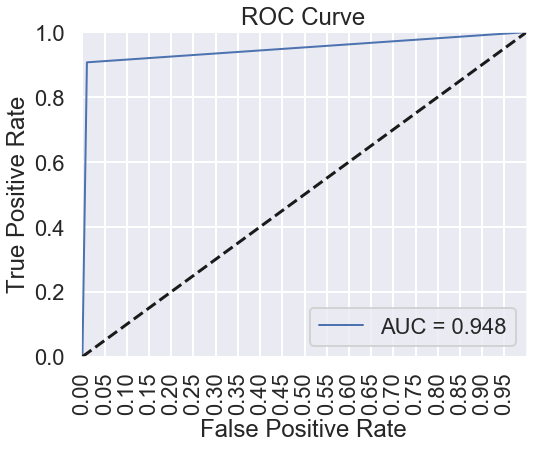

In [52]:
clf_dt_1 = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', DecisionTreeClassifier(criterion='entropy')), ])
clf_dt_1.fit(xtrain, ytrain) 
pred = clf_dt_1.predict(xtest)
dt_pred_prb = clf_dt_1.predict_proba(xtest)[:,1]
tn, fp, fn, tp = confusion_matrix(ytest, pred).ravel()
conf_matrix = pd.DataFrame({"Pred Not Spam":[tn,fn],"Predicted Spam":[fp,tp]},index=["Not Spam","Spam"])
print(conf_matrix)
accuracy_dt = accuracy_score(ytest,pred)
print("Accuracy: {}".format(accuracy_dt))
precision_dt = precision_score(ytest,pred)
print("Precision: {}".format(precision_dt))
recall_dt = recall_score(ytest,pred)
print("Recall: {}".format(recall_dt))
f1_dt = f1_score(ytest,pred)
print("F1 Score: {}".format(f1_dt))
fpr,tpr,threshold=roc_curve(ytest,dt_pred_prb)
auc_dt = roc_auc_score(ytest,dt_pred_prb)
print("AUC Score: {}".format(auc_dt))
sns.set_context('poster')
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_dt)

In [53]:
from wordcloud import WordCloud

In [54]:
df_Ham = df[df['Label']==0]
df_Spam = df[df['Label']==1]

In [55]:
df_Ham.head()

,FileName,FileContent,Label,Preprocessed,FinalPreprocessedData
0,3-1msg1.txt,Subject: re : 2 . 882 s - > np np\n\n> date : ...,0,Subject re s np np date sun dec est from micha...,subject np np date sun dec est michael mmors v...
1,3-1msg2.txt,Subject: s - > np + np\n\nthe discussion of s ...,0,Subject s np np the discussion of s np np remi...,subject np np discuss np np remind year ago re...
2,3-1msg3.txt,Subject: 2 . 882 s - > np np\n\n. . . for me i...,0,Subject s np np for me it s much more restrict...,subject np np much restrict np np np pro quit ...
3,3-375msg1.txt,"Subject: gent conference\n\n"" for the listserv...",0,Subject gent conference for the listserv inter...,subject gent confer listserv intern confer sec...
4,3-378msg1.txt,Subject: query : causatives in korean\n\ncould...,0,Subject query causatives in korean could anyon...,subject queri caus korean could anyon point bo...


In [56]:
text_Ham = " ".join(filecontect for filecontect in df.FinalPreprocessedData)
text_Spam = " ".join(filecontect for filecontect in df.FinalPreprocessedData)

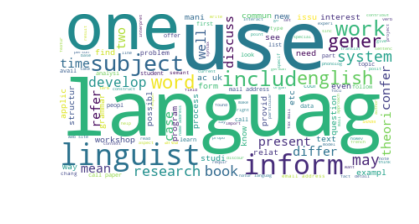

In [57]:
# Reference : DataCamp
wordcloud = WordCloud(background_color="white").generate(text_Ham)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

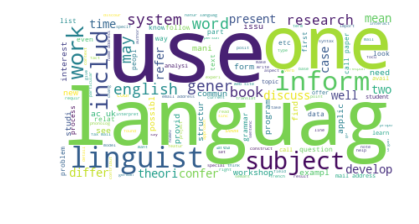

<Figure size 504x504 with 0 Axes>

In [58]:
wordcloud = WordCloud(background_color="white").generate(text_Spam)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=[7,7])
plt.show()

In [59]:
from sklearn.utils import resample

In [60]:
X = df['FinalPreprocessedData']
Y = df['Label']

In [61]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(2314,) (2314,)
(579,) (579,)


In [62]:
X = pd.concat([xtrain, ytrain], axis=1)

In [63]:
not_spam = X[X.Label==0]
spam = X[X.Label==1]

In [64]:
spam_upsampled = resample(spam,
                          replace=True, # sample with replacement
                          n_samples=len(not_spam), # match number in majority class
                          random_state=27) # reproducible results

In [65]:
upsampled = pd.concat([not_spam, spam_upsampled])

In [66]:
upsampled.Label.value_counts()

1    1919
0    1919
Name: Label, dtype: int64

In [67]:
ytrain = upsampled.Label
xtrain = upsampled.drop('Label', axis=1)

In [68]:
xtrain = np.squeeze(xtrain)

In [69]:
xtrain.shape

(3838,)

# Model 1 LR With Up Sampling

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


          Pred Not Spam  Predicted Spam
Not Spam            492               1
Spam                  3              83
Accuracy: 0.9930915371329879
Precision: 0.9880952380952381
Recall: 0.9651162790697675
F1 Score: 0.9764705882352942
AUC Score: 0.999764139817916


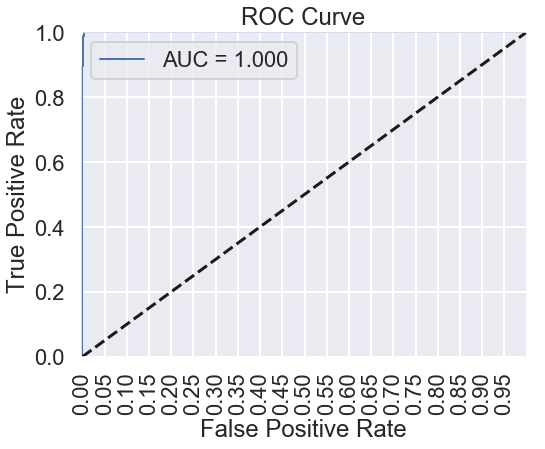

In [70]:
clf_log_1 = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', LogisticRegression()), ])
clf_log_1.fit(xtrain.values, ytrain) 
pred = clf_log_1.predict(xtest)
lr_pred_prb = clf_log_1.predict_proba(xtest)[:,1]
tn, fp, fn, tp = confusion_matrix(ytest, pred).ravel()
conf_matrix = pd.DataFrame({"Pred Not Spam":[tn,fn],"Predicted Spam":[fp,tp]},index=["Not Spam","Spam"])
print(conf_matrix)
accuracy_lr = accuracy_score(ytest,pred)
print("Accuracy: {}".format(accuracy_lr))
precision_lr = precision_score(ytest,pred)
print("Precision: {}".format(precision_lr))
recall_lr = recall_score(ytest,pred)
print("Recall: {}".format(recall_lr))
f1_lr = f1_score(ytest,pred)
print("F1 Score: {}".format(f1_lr))
fpr,tpr,threshold=roc_curve(ytest,lr_pred_prb)
auc_lr = roc_auc_score(ytest,lr_pred_prb)
print("AUC Score: {}".format(auc_lr))
sns.set_context('poster')
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_lr)

# Model 2 SVM With Up Sampling

          Pred Not Spam  Predicted Spam
Not Spam            492               1
Spam                  5              81
Accuracy: 0.9896373056994818
Precision: 0.9878048780487805
Recall: 0.9418604651162791
F1 Score: 0.9642857142857143
AUC Score: 0.999764139817916


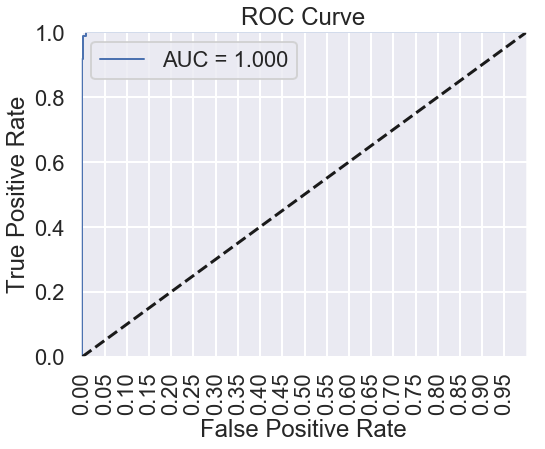

In [71]:
clf_svm_1 = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', SVC(kernel='linear',probability=True)), ])
clf_svm_1.fit(xtrain, ytrain) 
pred = clf_svm_1.predict(xtest)
svm_pred_prb = clf_svm_1.predict_proba(xtest)[:,1]
tn, fp, fn, tp = confusion_matrix(ytest, pred).ravel()
conf_matrix = pd.DataFrame({"Pred Not Spam":[tn,fn],"Predicted Spam":[fp,tp]},index=["Not Spam","Spam"])
print(conf_matrix)
accuracy_svm = accuracy_score(ytest,pred)
print("Accuracy: {}".format(accuracy_svm))
precision_svm = precision_score(ytest,pred)
print("Precision: {}".format(precision_svm))
recall_svm = recall_score(ytest,pred)
print("Recall: {}".format(recall_svm))
f1_svm = f1_score(ytest,pred)
print("F1 Score: {}".format(f1_svm))
fpr,tpr,threshold=roc_curve(ytest,svm_pred_prb)
auc_svm = roc_auc_score(ytest,svm_pred_prb)
print("AUC Score: {}".format(auc_svm))
sns.set_context('poster')
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_svm)

# Model 3 DT With Up Sampling

          Pred Not Spam  Predicted Spam
Not Spam            487               6
Spam                 10              76
Accuracy: 0.9723661485319517
Precision: 0.926829268292683
Recall: 0.8837209302325582
F1 Score: 0.9047619047619047
AUC Score: 0.9357752724185103


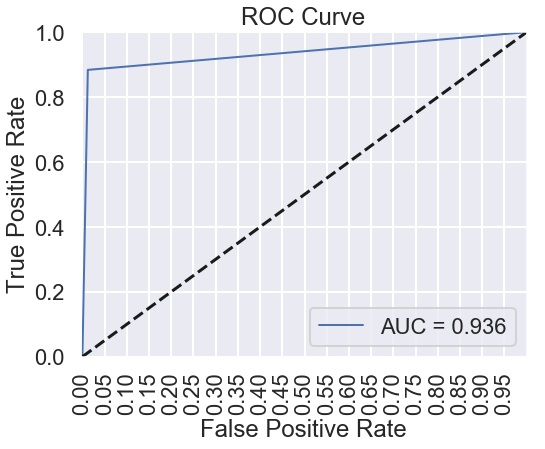

In [72]:
clf_dt_1 = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', DecisionTreeClassifier(criterion='entropy')), ])
clf_dt_1.fit(xtrain, ytrain) 
pred = clf_dt_1.predict(xtest)
dt_pred_prb = clf_dt_1.predict_proba(xtest)[:,1]
tn, fp, fn, tp = confusion_matrix(ytest, pred).ravel()
conf_matrix = pd.DataFrame({"Pred Not Spam":[tn,fn],"Predicted Spam":[fp,tp]},index=["Not Spam","Spam"])
print(conf_matrix)
accuracy_dt = accuracy_score(ytest,pred)
print("Accuracy: {}".format(accuracy_dt))
precision_dt = precision_score(ytest,pred)
print("Precision: {}".format(precision_dt))
recall_dt = recall_score(ytest,pred)
print("Recall: {}".format(recall_dt))
f1_dt = f1_score(ytest,pred)
print("F1 Score: {}".format(f1_dt))
fpr,tpr,threshold=roc_curve(ytest,dt_pred_prb)
auc_dt = roc_auc_score(ytest,dt_pred_prb)
print("AUC Score: {}".format(auc_dt))
sns.set_context('poster')
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_dt)

In [79]:
X = df['FinalPreprocessedData']
Y = df['Label']
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(2314,) (2314,)
(579,) (579,)


In [80]:
not_spam_downsampled = resample(not_spam,
                                replace = False, # sample without replacement
                                n_samples = len(spam), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([not_spam_downsampled, spam])

# checking counts
downsampled.Label.value_counts()

1    395
0    395
Name: Label, dtype: int64

In [81]:
ytrain = upsampled.Label
xtrain = upsampled.drop('Label', axis=1)
xtrain = np.squeeze(xtrain)

# LR With Down Sampling

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


          Pred Not Spam  Predicted Spam
Not Spam            492               1
Spam                  3              83
Accuracy: 0.9930915371329879
Precision: 0.9880952380952381
Recall: 0.9651162790697675
F1 Score: 0.9764705882352942
AUC Score: 0.999764139817916


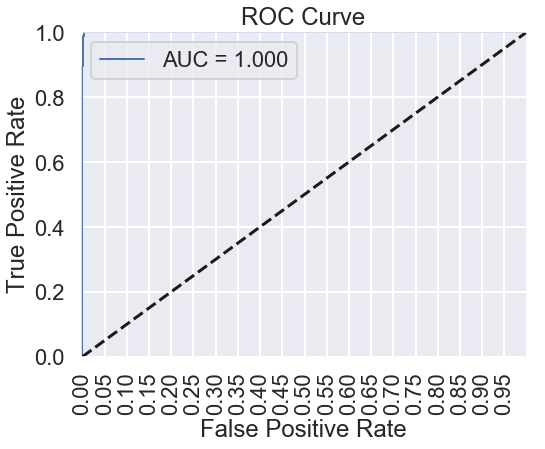

In [82]:
clf_log_1 = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', LogisticRegression()), ])
clf_log_1.fit(xtrain.values, ytrain) 
pred = clf_log_1.predict(xtest)
lr_pred_prb = clf_log_1.predict_proba(xtest)[:,1]
tn, fp, fn, tp = confusion_matrix(ytest, pred).ravel()
conf_matrix = pd.DataFrame({"Pred Not Spam":[tn,fn],"Predicted Spam":[fp,tp]},index=["Not Spam","Spam"])
print(conf_matrix)
accuracy_lr = accuracy_score(ytest,pred)
print("Accuracy: {}".format(accuracy_lr))
precision_lr = precision_score(ytest,pred)
print("Precision: {}".format(precision_lr))
recall_lr = recall_score(ytest,pred)
print("Recall: {}".format(recall_lr))
f1_lr = f1_score(ytest,pred)
print("F1 Score: {}".format(f1_lr))
fpr,tpr,threshold=roc_curve(ytest,lr_pred_prb)
auc_lr = roc_auc_score(ytest,lr_pred_prb)
print("AUC Score: {}".format(auc_lr))
sns.set_context('poster')
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_lr)

# SVM With Down Sampling

          Pred Not Spam  Predicted Spam
Not Spam            492               1
Spam                  5              81
Accuracy: 0.9896373056994818
Precision: 0.9878048780487805
Recall: 0.9418604651162791
F1 Score: 0.9642857142857143
AUC Score: 0.9997641398179159


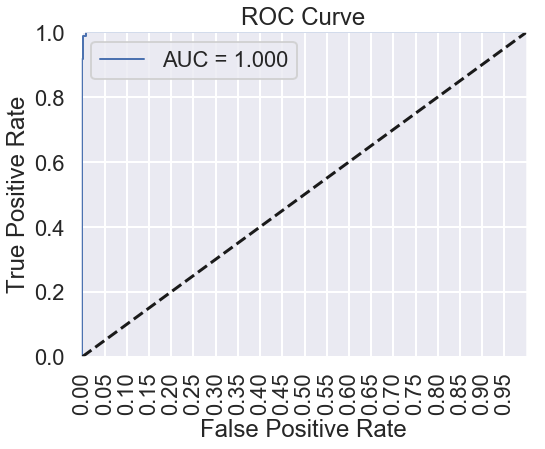

In [83]:
clf_svm_1 = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', SVC(kernel='linear',probability=True)), ])
clf_svm_1.fit(xtrain, ytrain) 
pred = clf_svm_1.predict(xtest)
svm_pred_prb = clf_svm_1.predict_proba(xtest)[:,1]
tn, fp, fn, tp = confusion_matrix(ytest, pred).ravel()
conf_matrix = pd.DataFrame({"Pred Not Spam":[tn,fn],"Predicted Spam":[fp,tp]},index=["Not Spam","Spam"])
print(conf_matrix)
accuracy_svm = accuracy_score(ytest,pred)
print("Accuracy: {}".format(accuracy_svm))
precision_svm = precision_score(ytest,pred)
print("Precision: {}".format(precision_svm))
recall_svm = recall_score(ytest,pred)
print("Recall: {}".format(recall_svm))
f1_svm = f1_score(ytest,pred)
print("F1 Score: {}".format(f1_svm))
fpr,tpr,threshold=roc_curve(ytest,svm_pred_prb)
auc_svm = roc_auc_score(ytest,svm_pred_prb)
print("AUC Score: {}".format(auc_svm))
sns.set_context('poster')
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_svm)

# DT With Down Sampling

          Pred Not Spam  Predicted Spam
Not Spam            484               9
Spam                  9              77
Accuracy: 0.9689119170984456
Precision: 0.8953488372093024
Recall: 0.8953488372093024
F1 Score: 0.8953488372093024
AUC Score: 0.9385466295579981


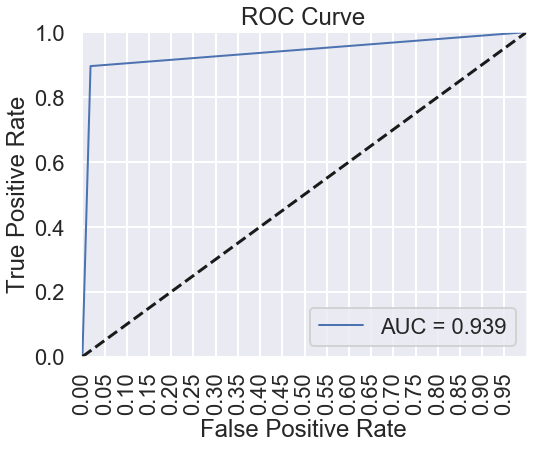

In [84]:
clf_dt_1 = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', DecisionTreeClassifier(criterion='entropy')), ])
clf_dt_1.fit(xtrain, ytrain) 
pred = clf_dt_1.predict(xtest)
dt_pred_prb = clf_dt_1.predict_proba(xtest)[:,1]
tn, fp, fn, tp = confusion_matrix(ytest, pred).ravel()
conf_matrix = pd.DataFrame({"Pred Not Spam":[tn,fn],"Predicted Spam":[fp,tp]},index=["Not Spam","Spam"])
print(conf_matrix)
accuracy_dt = accuracy_score(ytest,pred)
print("Accuracy: {}".format(accuracy_dt))
precision_dt = precision_score(ytest,pred)
print("Precision: {}".format(precision_dt))
recall_dt = recall_score(ytest,pred)
print("Recall: {}".format(recall_dt))
f1_dt = f1_score(ytest,pred)
print("F1 Score: {}".format(f1_dt))
fpr,tpr,threshold=roc_curve(ytest,dt_pred_prb)
auc_dt = roc_auc_score(ytest,dt_pred_prb)
print("AUC Score: {}".format(auc_dt))
sns.set_context('poster')
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_dt)